<a href="https://colab.research.google.com/github/Atolwa/Sentiment-Analysis-of-Kenyan-Political-Tweets/blob/main/TSAPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#SENTIMENT ANALYSIS OF POLITICAL TWEETS

In [ ]:
#Import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#get the data
df = pd.read_csv(r'/content/drive/MyDrive/kenya_political_tweets.csv')
print (df.text)

0        @PrettyAmmina The change to the new blue unifo...
1        I think it's now safe to say President Uhuru K...
2        @_CrazyKenyan President Uhuru Kenyatta bribed ...
3        As @HonMoses_Kuria has just been saying,Presid...
4        David Murathe the KEMSA thief and President Uh...
                               ...                        
11718    Preparations are in top gear for the coronatio...
11719    "I managed to kick William Ruto out of Jubilee...
11720    If William Ruto and Uhuru Kenyatta could not m...
11721    DP William Ruto has criticized proponents of B...
11722    In the early 90s, companies used to look for g...
Name: text, Length: 11723, dtype: object


In [ ]:
#Create a dataframe with a column called tweets
tweetsDF=pd.DataFrame([df for df in df.text] , columns=['Tweets'])
tweetsDF.head()

,Tweets
0,@PrettyAmmina The change to the new blue unifo...
1,I think it's now safe to say President Uhuru K...
2,@_CrazyKenyan President Uhuru Kenyatta bribed ...
3,"As @HonMoses_Kuria has just been saying,Presid..."
4,David Murathe the KEMSA thief and President Uh...


In [ ]:
#Clean the text
#Create Function to clean the tweets
def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+', '',str(text))#removes @ mentions
  text = re.sub(r'#','',text)#remove the # symbol
  text = re.sub(r'RT[\s]+','',text)#remove RT
  text = re.sub(r'https?:\/\/\S+','',text)#remove hyper link

  return text

#Apply Function
tweetsDF['Tweets'] = tweetsDF['Tweets'].apply(cleanTxt)

#Show cleaned text
tweetsDF


,Tweets
0,The change to the new blue uniforms was order...
1,I think it's now safe to say President Uhuru K...
2,", Mpigs and senators\nSo your are crucifying D..."
3,"As _Kuria has just been saying,President Uhuru..."
4,David Murathe the KEMSA thief and President Uh...
...,...
11718,Preparations are in top gear for the coronatio...
11719,"""I managed to kick William Ruto out of Jubilee..."
11720,If William Ruto and Uhuru Kenyatta could not m...
11721,DP William Ruto has criticized proponents of B...


In [ ]:
#Create a function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#Create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment. polarity

#Create two new columns
tweetsDF['Subjectivity'] =tweetsDF['Tweets'].apply(getSubjectivity)
tweetsDF['Polarity'] =tweetsDF['Tweets'].apply(getPolarity)


#show the new datframe with the new columns
tweetsDF

,Tweets,Subjectivity,Polarity
0,The change to the new blue uniforms was order...,0.277273,0.068182
1,I think it's now safe to say President Uhuru K...,0.500000,0.500000
2,", Mpigs and senators\nSo your are crucifying D...",0.600000,0.000000
3,"As _Kuria has just been saying,President Uhuru...",0.454545,0.136364
4,David Murathe the KEMSA thief and President Uh...,0.500000,0.200000
...,...,...,...
11718,Preparations are in top gear for the coronatio...,0.500000,0.500000
11719,"""I managed to kick William Ruto out of Jubilee...",0.000000,0.000000
11720,If William Ruto and Uhuru Kenyatta could not m...,0.357143,0.000000
11721,DP William Ruto has criticized proponents of B...,0.100000,0.000000


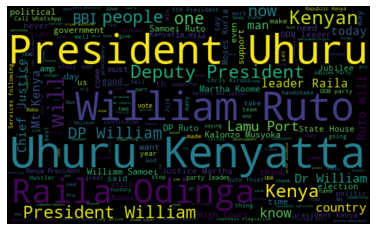

In [ ]:
#Word Cloud
allWords = ' '.join([twts for twts in tweetsDF['Tweets']])
wordCloud = WordCloud(width = 500, height = 300, random_state =21, max_font_size =119).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()


In [ ]:
#Create a function to compute the negative, positive and neutral analysis
def getAnalysis(score):
  if score <0:
    return 'Negative'
  elif score ==0:
    return 'Neutral'
  else:
    return 'Positive'
tweetsDF['Analysis'] = tweetsDF['Polarity'].apply(getAnalysis)
#show dataframe
tweetsDF
        

,Tweets,Subjectivity,Polarity,Analysis
0,The change to the new blue uniforms was order...,0.277273,0.068182,Positive
1,I think it's now safe to say President Uhuru K...,0.500000,0.500000,Positive
2,", Mpigs and senators\nSo your are crucifying D...",0.600000,0.000000,Neutral
3,"As _Kuria has just been saying,President Uhuru...",0.454545,0.136364,Positive
4,David Murathe the KEMSA thief and President Uh...,0.500000,0.200000,Positive
...,...,...,...,...
11718,Preparations are in top gear for the coronatio...,0.500000,0.500000,Positive
11719,"""I managed to kick William Ruto out of Jubilee...",0.000000,0.000000,Neutral
11720,If William Ruto and Uhuru Kenyatta could not m...,0.357143,0.000000,Neutral
11721,DP William Ruto has criticized proponents of B...,0.100000,0.000000,Neutral


In [ ]:
#Print all of the positive tweets
j=1
sortedDF=tweetsDF.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i]== 'Positive'):
    print(str(j)+')'+sortedDF['Tweets'][i])
    print()
    j= j+1

Streaming output truncated to the last 5000 lines.
And… 

1848)D.P William Ruto would rather a divided GEMA region because it's weak and he can easily subdue it. 

But if the reg… 

1849)Uhuru, you brought one of the most despised and controversial political figures of the era into our lives with colo… 

1850)Good Morning
Juja I KenyaMilele I Nyoro
Uhuru Kenyatta I KabogoVsKuria Zack Kinuthia I IEBC WednesdayThought… 

1851) I remember how Mr Kenyatta gladly took a knockdown from Raila Odinga and even made fun of it at Bomas.… 

1852)William Ruto controls more than 50% of registered voters in Central Kenya.

1853)When I say William Ruto made Uhuru Kenyatta the president, most of you will tend to hesitate. 

The Deputy outwits… 

1854)Jubilee Party Wrangles:

Solomon Kuria:
It's high time DP William Ruto and others disassociate themselves from Jubi… 

1855)Good morning Kenyans ,
Deputy President William Ruto and ANC leader Musalia Mudavadi.
 For presidential sit  in Aug… 

1856)Apparent

In [ ]:
#print the negative tweets
j=1
sortedDF=tweetsDF.sort_values(by=['Polarity'],ascending='False')
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i]== 'Negative'):
    print(str(j)+')'+sortedDF['Tweets'][i])
    print()
    j= j+1

1)Somebody tell CS Peter Munya to die before 2022 if he is not ready to see DP Ruto as the 5th President of Kenya.Pre… 

2)The leaders urged residents of the Central Region Economic Bloc (CEREB) to stay united behind His Excellency Presid… 

3)In a scathing ruling, five High Court judges in Kenya have blocked a government-backed plan to make fundamental cha… 

4)And above All an eminent impeachment after the President Failed in Chapter 6,that he took oath to protect,This is w… 

5)Which Kenyans cannot see and appreciate President Uhuru Kenyatta's milestone achievements still!? The blind and dum… 

6)President Muse Bihii and Uhuru Kenyatta join Other Foreign leaders in Djibouti for Presidential inauguration. 

7)President  of the Republic of Somaliland and President Uhuru Kenyatta of Kenya joined with other Africa… 

8)Uhuru chronicles.
1.Ruto was betrayed.

2.Raila played and betrayed.

3.Handshake/BBI dead.

4.Ruto the 5th Preside… 

9)Arsenal is home for Kenya political losers  like 

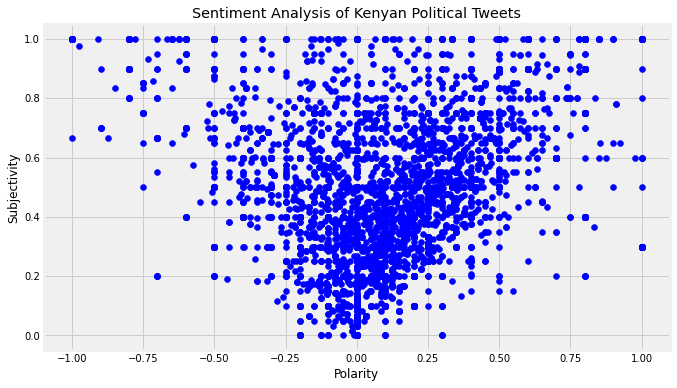

In [ ]:
#plot the polarity and subjectivity
plt.figure(figsize=(10,6))
for i in range(0,tweetsDF.shape[0]):
  plt.scatter(tweetsDF['Polarity'][i],tweetsDF['Subjectivity'][i],color='Blue')

plt.title('Sentiment Analysis of Kenyan Political Tweets')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()


In [ ]:
#get the percentage positive tweets
ptweets=tweetsDF[tweetsDF.Analysis=='Positive']
ptweets = ptweets['Tweets']
round( (ptweets.shape[0] / tweetsDF.shape[0])*100, 1)

31.5

In [ ]:
#get the percentage negative tweets
ntweets=tweetsDF[tweetsDF.Analysis=='Negative']
ntweets = ntweets['Tweets']
round( (ntweets.shape[0] / tweetsDF.shape[0])*100, 1)

14.2

In [ ]:
#get the percentage neutral tweets
neutraltweets=tweetsDF[tweetsDF.Analysis=='Neutral']
neutraltweets = neutraltweets['Tweets']
round( (neutraltweets.shape[0] / tweetsDF.shape[0])*100, 1)

54.3

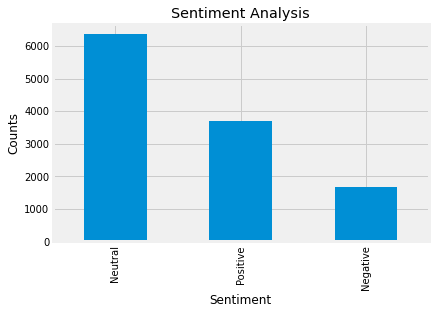

In [ ]:
#show value counts
tweetsDF['Analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
tweetsDF['Analysis'].value_counts().plot(kind='bar')
plt.show()